In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,fsolve
from iapws import IAPWS97

The raw Hamilton data is reproduced here and parsed

In [2]:
raw_data = """TF Temp	HTF mdot	Ambient T	Wdot cycle	Heat In
500	0.300	30	0.237641861	0.31466289
504.2	0.300	30	0.242543393	0.318919287
508.4	0.300	30	0.247479625	0.323186151
512.6	0.300	30	0.252450559	0.327456504
516.8	0.300	30	0.257447519	0.331737323
521.1	0.300	30	0.262470504	0.336021631
525.3	0.300	30	0.267528191	0.340312917
529.5	0.300	30	0.272611903	0.34461118
533.7	0.300	30	0.277721641	0.348916421
537.9	0.300	30	0.28286608	0.35322864
542.1	0.300	30	0.288036545	0.357544348
546.3	0.300	30	0.293241711	0.361867033
550.5	0.300	30	0.298464228	0.366196696
554.7	0.300	30	0.303712771	0.370533337
558.9	0.300	30	0.308996014	0.374873467
563.2	0.300	30	0.314305284	0.379220574
567.4	0.300	30	0.319631904	0.38357117
571.6	0.300	30	0.3250019	0.387932233
575.8	0.300	30	0.330389247	0.392293296
580	0.300	30	0.335811295	0.396664825
500	1.000	30	0.766426017	0.810896011
504.2	1.000	30	0.782518656	0.824028044
508.4	1.000	30	0.798672022	0.837187987
512.6	1.000	30	0.81489479	0.850382818
516.8	1.000	30	0.83118696	0.863602072
521.1	1.000	30	0.847548532	0.876849236
525.3	1.000	30	0.863962156	0.890120822
529.5	1.000	30	0.880427832	0.903420319
533.7	1.000	30	0.896954234	0.916744238
537.9	1.000	30	0.913524013	0.930092579
542.1	1.000	30	0.930137169	0.943461853
546.3	1.000	30	0.946802376	0.956855549
550.5	1.000	30	0.963493608	0.970266689
554.7	1.000	30	0.980228218	0.98370574
558.9	1.000	30	0.996980177	0.997158747
563.2	1.000	30	1.013766838	1.010632686
567.4	1.000	30	1.030562174	1.02412407
571.6	1.000	30	1.047383536	1.037636387
575.8	1.000	30	1.064213574	1.051162659
580	1.000	30	1.081052286	1.064706376
500	1.200	30	0.889051057	0.924098734
504.2	1.200	30	0.907668201	0.939515964
508.4	1.200	30	0.926337397	0.954957615
512.6	1.200	30	0.94504997	0.970434154
516.8	1.200	30	0.963788568	0.985938605
521.1	1.200	30	0.982561867	1.001477943
525.3	1.200	30	1.001361192	1.017034727
529.5	1.200	30	1.020169193	1.032622909
533.7	1.200	30	1.038985868	1.048232025
537.9	1.200	30	1.057802544	1.063865563
542.1	1.200	30	1.076593194	1.079513056
546.3	1.200	30	1.095375169	1.095184971
550.5	1.200	30	1.114122442	1.110867353
554.7	1.200	30	1.132835014	1.126570668
558.9	1.200	30	1.15148686	1.14228096
563.2	1.200	30	1.170077978	1.158008697
567.4	1.200	30	1.188591019	1.173739923
571.6	1.200	30	1.207025983	1.189481615
575.8	1.200	30	1.225348168	1.205223307
580	1.200	30	1.243566249	1.220971977
560	0.300	0	0.338665461	0.375968966
560	0.347	0	0.396304002	0.425821147
560	0.395	0	0.452910184	0.474173122
560	0.442	0	0.508414606	0.521171423
560	0.490	0	0.562947396	0.567074225
560	0.537	0	0.616161545	0.611700108
560	0.584	0	0.668221882	0.655261892
560	0.632	0	0.719102381	0.697829354
560	0.679	0	0.768976549	0.739580424
560	0.726	0	0.817532074	0.780323217
560	0.774	0	0.864916436	0.820221708
560	0.821	0	0.910426939	0.859314275
560	0.868	0	0.9546188	0.89774396
560	0.916	0	0.997622148	0.935311899
560	0.963	0	1.039532411	0.97214718
560	1.010	0	1.080297537	1.008274224
560	1.058	0	1.119978254	1.043808163
560	1.105	0	1.158279602	1.078543156
560	1.153	0	1.195236281	1.112590845
560	1.200	0	1.230761541	1.14595472
560	0.300	30	0.310323332	0.375958499
560	0.347	30	0.363129742	0.425817658
560	0.395	30	0.415155378	0.474176611
560	0.442	30	0.466356863	0.521185378
560	0.490	30	0.51685565	0.567095158
560	0.537	30	0.566348105	0.611728019
560	0.584	30	0.614947006	0.655303758
560	0.632	30	0.66266103	0.697885175
560	0.679	30	0.709602953	0.73965369
560	0.726	30	0.755469142	0.780410438
560	0.774	30	0.800398402	0.820326374
560	0.821	30	0.844347355	0.859436385
560	0.868	30	0.887420105	0.897883514
560	0.916	30	0.929330368	0.935465408
560	0.963	30	0.970156221	0.972318133
560	1.010	30	1.009854288	1.008462622
560	1.058	30	1.048476621	1.044010516
560	1.105	30	1.085728261	1.078762953
560	1.153	30	1.121643907	1.112831576
560	1.200	30	1.156145484	1.146212895
560	0.300	55	0.233850765	0.375951522
560	0.347	55	0.276411674	0.42581068
560	0.395	55	0.318894505	0.474169633
560	0.442	55	0.361195156	0.52118189
560	0.490	55	0.403330976	0.567095158
560	0.537	55	0.444989656	0.611734997
560	0.584	55	0.486205897	0.655317714
560	0.632	55	0.526944997	0.697909597
560	0.679	55	0.567250334	0.739688579
560	0.726	55	0.606826947	0.78046626
560	0.774	55	0.64576159	0.820403128
560	0.821	55	0.683993536	0.859534072
560	0.868	55	0.721748341	0.898009113
560	0.916	55	0.758652969	0.935618918
560	0.963	55	0.794672719	0.972499554
560	1.010	55	0.829738188	1.008671953
560	1.058	55	0.863858053	1.044254736
560	1.105	55	0.896763378	1.079035084
560	1.153	55	0.928471515	1.113135106
560	1.200	55	0.958869686	1.146551313
500	1.000	0	0.830649092	0.810742502
500	1.000	2.895	0.830649092	0.810742502
500	1.000	5.789	0.830649092	0.810742502
500	1.000	8.684	0.830649092	0.810742502
500	1.000	11.58	0.830067849	0.810745991
500	1.000	14.47	0.827508642	0.810759946
500	1.000	17.37	0.822468306	0.810780879
500	1.000	20.26	0.814435	0.810805301
500	1.000	23.16	0.803200516	0.810833212
500	1.000	26.05	0.789146568	0.810857634
500	1.000	28.95	0.77277632	0.810885545
500	1.000	31.84	0.7549226	0.810913456
500	1.000	34.74	0.736123275	0.810934389
500	1.000	37.63	0.717089717	0.810955322
500	1.000	40.53	0.698108211	0.810976255
500	1.000	43.42	0.67959517	0.81099021
500	1.000	46.32	0.661628672	0.811000677
500	1.000	49.21	0.644434273	0.811004166
500	1.000	52.11	0.627942571	0.811004166
500	1.000	55	0.612283696	0.810993699
560	1.000	0	1.071379353	1.000344067
560	1.000	2.895	1.071379353	1.000344067
560	1.000	5.789	1.071379353	1.000344067
560	1.000	8.684	1.071379353	1.000344067
560	1.000	11.58	1.070589902	1.000347556
560	1.000	14.47	1.067874541	1.000365
560	1.000	17.37	1.062539245	1.000385933
560	1.000	20.26	1.053968072	1.000413844
560	1.000	23.16	1.041831359	1.000445244
560	1.000	26.05	1.026432743	1.000480132
560	1.000	28.95	1.008275388	1.000515021
560	1.000	31.84	0.988226823	1.00054642
560	1.000	34.74	0.966902992	1.000581309
560	1.000	37.63	0.945084671	1.000612709
560	1.000	40.53	0.92313622	1.000640619
560	1.000	43.42	0.901578157	1.00066853
560	1.000	46.32	0.880514584	1.000692952
560	1.000	49.21	0.860240462	1.000710396
560	1.000	52.11	0.840703738	1.000724352
560	1.000	55	0.822069244	1.000731329
580	1.000	0	1.153239266	1.064511
580	1.000	2.895	1.153239266	1.064511
580	1.000	5.789	1.153239266	1.064511
580	1.000	8.684	1.153239266	1.064511
580	1.000	11.58	1.152406439	1.064517978
580	1.000	14.47	1.149621675	1.064531933
580	1.000	17.37	1.144173601	1.064556355
580	1.000	20.26	1.135402896	1.064587755
580	1.000	23.16	1.122953874	1.064619155
580	1.000	26.05	1.107112818	1.064657532
580	1.000	28.95	1.088391571	1.06469242
580	1.000	31.84	1.067648983	1.064730798
580	1.000	34.74	1.045527027	1.064765686
580	1.000	37.63	1.022841178	1.064800575
580	1.000	40.53	0.999964473	1.064835463
580	1.000	43.42	0.977443454	1.064866863
580	1.000	46.32	0.9553909	1.064894774
580	1.000	49.21	0.934119121	1.064915707
580	1.000	52.11	0.913602091	1.06493664
580	1.000	55	0.89400464	1.064947107"""

#This function is used to parse the above table
def get_x_and_PQ(raw_data):
    lines = raw_data.split("\n")[1:]
    
    y1=[] #W
    y2=[] #Q
    x=[[],[],[]] #Tf,mdot,Tamb
    
    for line in lines:
        items = line.strip().split()
        for j in range(3):
            x[j].append(float(items[j]))
        y1.append(float(items[3]))
        y2.append(float(items[4]))
    return x,y1,y2

#parse the Hamilton data
x,raw_P,raw_Q= get_x_and_PQ(raw_data)

#Turn Hamilton Data into Numpy arrays          
x=np.array(x)
raw_P=np.array(raw_P)
raw_Q=np.array(raw_Q)

#Add 73K to the hot temperature to match the Westinghouse design point of 633C
x[0]+=73 


x is a 2D structure containing $T_{hot}$,$\dot{m}$,$T_{ambient}$
P and Q are power and heat respectively

Produce a 2nd order regression model of the Hamilton data



In [3]:
def fn(x,a,b,c,d,
       e,
       f,
       g,
       h,
       i,
       j
       ):
    
    result=  a+b*x[0]+c*x[1]+d*x[2]
    result+= e*x[0]*x[1]
    result+= f*x[1]*x[2]
    result+= g*x[0]*x[2]
    result+= h*x[0]**2
    result+= i*x[1]**2
    result+=j*x[2]**2
    return result

def find_popt(x,y,fn):
    popt,pcov=curve_fit(fn,x,y)
    predict=fn(x,*popt)
    residual=np.sum((y-predict)**2)
    print(residual)
    return predict,popt

predict_P,popt_P = find_popt(x,raw_P,fn)
predict_Q,popt_Q = find_popt(x,raw_Q,fn)


0.011680034767623321
0.00023999290922823067


It can be seen above that the residuals are small, sum of squares is tiny. Note that the use of this regression model here is pretty underwhelming - we'll use it to do some interpolations but it squashes the proverbial fly with a sledgehammer. But to prove the model is basically identical, here are all 180 statepoints plotted:



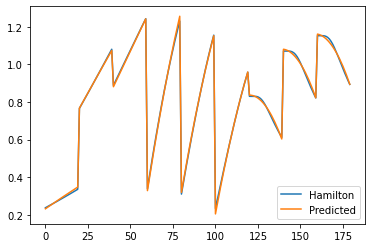

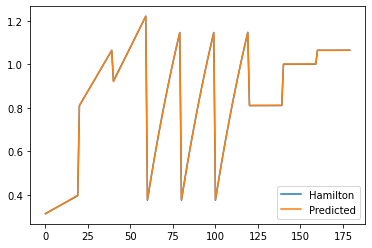

In [16]:
def plot_compare(y,predict):
    plt.plot(y,label="Hamilton")
    plt.plot(predict,label="Predicted")
    plt.legend(loc="lower right")
    plt.show()
    
plot_compare(raw_P,predict_P)
plot_compare(raw_Q,predict_Q)

Now produce a table that is Hamilton but all the temperatures raised by 73C 

In [4]:
with open("hamilton_higher_T.csv","w") as f:
    for j in range(x[0].shape[0]):
        f.write("{0:.0f},{1:.3f},{2:.0f},{3:.6f},{4:.6f},1,1\n".format(
            x[0][j],x[1][j],x[2][j],raw_P[j],raw_Q[j]))



Graph P vs Q for two cases
(1) Mixing of 550C steam with 633C steam
(2) 633C steam only
We assume the design point of the turbine is larger than the LFR, based on previous reslts and (presumably) a non-zero average solar contribution we want to design for

In [5]:
P=[]
Q=[]
for j,T_CSP in enumerate([550,633]): 

    propn_LFR_flow = 0.8 #Proportion of turbine rating delivered by LFR only at full power . Can change   
    T_amb = 32.44 #C Ambient
    wec_P = 465.0 #MW LFR electrical power
    design_P = wec_P/propn_LFR_flow #MW 
    T_LFR = 633 #C source: Westinghouse PEPSE
    pressure = 33 #MPa source: westinghouse
    
    mdot_lfr_only = wec_P/design_P #mdot at which Salt2Steam kicks in
    
    #Steam properties
    lfr_steam = IAPWS97(T=T_LFR+273.15,P=pressure)
    csp_steam = IAPWS97(T=T_CSP+273.15,P=pressure)
    
    y=[[],[],[]] #Tf,mdot,T_amb
    
    #Vary mdot to get different P and Q
    mdots = [0.01]+[0.1*j for j in range(1,20)]
    for mdot in mdots:
        #calculate the temperature of the hot stream
        y[1].append(mdot)
        y[2].append(T_amb)
        if mdot<=mdot_lfr_only:
            y[0].append(T_LFR)
        else:
            #Mass-flow weighted enthalpy to turbine - then get temperature
            h = (lfr_steam.h*mdot_lfr_only+csp_steam.h*(mdot-mdot_lfr_only))/mdot
            T_mix = IAPWS97(h=h,P=pressure).T-273.15
            y[0].append(T_mix)
    

    y = np.array(y)
    SAM_gen1 = fn(y,*popt_P)
    SAM_gen2 = fn(y,*popt_Q)
    Q.append(SAM_gen2)
    P.append(SAM_gen1)

Q=np.array(Q)
P=np.array(P) 

Now we plot straight lines with gradient at the design point. The design point is at mdot=1, which is x[10]. So use some hardcoded cells to find the gradient

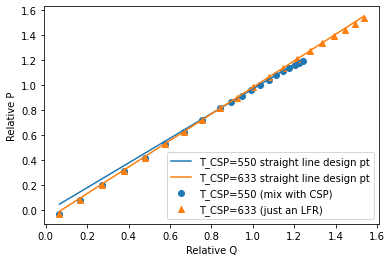

In [18]:
def plot_P_and_Q(P,Q):
    plt.scatter(Q[0],P[0],label="T_CSP=550 (mix with CSP)",marker='o')
    plt.scatter(Q[1],P[1],label="T_CSP=633 (just an LFR)",marker='^')

    #Plot a straight line for each case going through mdot=100%
    m = np.divide(P[:,11]-P[:,9],Q[:,11]-Q[:,9])
    c = P[:,10]-np.multiply(m,Q[:,10])

    Px=np.zeros((2,20))
    Px[0]=m[0]*Q[0]+c[0]
    Px[1]=m[1]*Q[1]+c[1]

    
    plt.plot(Q[0],Px[0],label="T_CSP=550 straight line design pt")
    plt.plot(Q[1],Px[1],label="T_CSP=633 straight line design pt")

    plt.ylabel("Relative P")
    plt.xlabel("Relative Q")
    plt.legend(loc='lower right')
    return m,c

m,c=plot_P_and_Q(P,Q)

Let's take a look at gradient and intercept. Remember, first value is for T_CSP=550 (the one we want). Second value is the case for just LFR

In [7]:
print(m)
print(c)

[0.98872985 1.06275465]
[-0.01641161 -0.07849572]


A few notes (Ben's opinions!)

* No major kink at design point. This is because the design point is at a point where some flow mixing is already taking place
* Triangles and circles line up for mdot<0.8, set by mdot=0.8 being point where CSP turns on.

Now we want to add in the effect of the turbine stages upstream of the steam2salt HX. Here we use mdot as the steam *after* mixing with the flow from the salt2steam. 

At mdot<0.8, we are now missing the heat that was in these upstream turbine stages. We add it back on. Two guesses are needed here, to be updated from Brian's model:
* The pressure of the steam at the extraction point (assumed to be isentropic efficiency of 90%)
* The pressure and temperature of steam at the turbine exhaust, taken from Brian's model at current state

In [8]:
Q2=np.array(Q)
lfr_steam = IAPWS97(T=633+273.15,P=pressure)
lfr_steam_s = lfr_steam.s

def turbine_outlet(p):
    #find pressure ratio that gives turbine isentropic efficiency of 90% and outlet T=570C
    p=p[0]
    s2s_steam=IAPWS97(T=570+273.15,P=p)
    delta_h_s=(lfr_steam.h-s2s_steam.h)/0.9
    s2s_steam_s=IAPWS97(h=lfr_steam.h-delta_h_s,P=p).s
    return s2s_steam_s-lfr_steam_s

p=fsolve(turbine_outlet,[24])[0]

s2s_steam = IAPWS97(T=570+273.15,P=p) #enthalpy of steam going to salt2steam
cond_steam = IAPWS97(T=306,P=0.5) #enthalpy of steam at turbine exhaust

extra_enthalpy = (lfr_steam.h-s2s_steam.h)/(lfr_steam.h-cond_steam.h) #the enthalpy that was extracted upstream of steam2salt relative to design point enthalpy

#Now add this to Q2
for j in range(int(10*propn_LFR_flow)):
    Q2[:,j]+=(1-x[1][j])*extra_enthalpy #mass flow weighting (1-x[1][j] is the mass flow through the steam2salt HX)
print(lfr_steam.h,s2s_steam.h,cond_steam.h,extra_enthalpy)

3524.022053495547 3418.21764105932 138.10628324207462 0.031248388800973102


Now assume that all of this heat extracted is turned into work

In [9]:
P2=np.array(P)
for j in range(int(10*propn_LFR_flow)):
    P2[:,j]+=(1-y[1][j])*extra_enthalpy

Plot the updated curves and take a look at new gradients

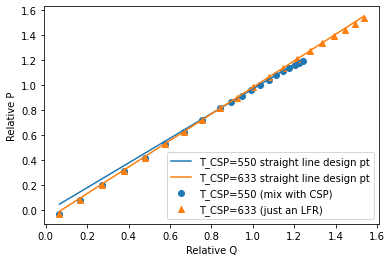

In [19]:
m2,c2=plot_P_and_Q(P,Q)

In [11]:
print(m2)
print(c2)

[0.98872985 1.06275465]
[-0.01641161 -0.07849572]


We see virtually no difference, certainly not in gradient at design point. So no change to SAM. Values at low mass flows have changed, but the enthalpy extracted. Finally we need to update the Hamilton tables and write them to a file

In [14]:
with open("hamilton_higher_T_flow_split.csv","w") as f:
    for j in range(x[0].shape[0]):
        
        #add on a term if needed
        if x[1][j]<propn_LFR_flow:
            add_term=(1-x[1][j])*extra_enthalpy
        else:
            add_term=0
        
        f.write("{0:.0f},{1:.3f},{2:.0f},{3:.6f},{4:.6f},1,1\n".format(
            x[0][j],x[1][j],x[2][j],raw_P[j]+add_term,raw_Q[j]+add_term))

So to sum up, I recommend a simple linear function in pyomo with coefficients m2,c2 (first value for each one). The hamilton_higher_T_flow_split.csv is a crude approximation to the required table but the effect of the high pressure turbine stage is so minor it barely matters. This script should technically be rerun for a different design point power (change propn_LFR_flow) but is unlikely to change much. 